In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from imblearn import under_sampling,over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('/content/drive/MyDrive/Strokesdataset.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [5]:
data=data.drop(['id'],axis=1)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [6]:
 data.stroke.value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     30108 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


In [8]:
data.isnull().sum()
data.describe()
data['smoking_status'].value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [9]:
data['smoking_status'].isnull().mean()


0.3062672811059908

In [10]:
data['smoking_status'].mode()

0    never smoked
Name: smoking_status, dtype: object

In [11]:
data['bmi'].isnull().mean()

0.03368663594470046

In [12]:
data.duplicated().sum()

0

In [13]:
data[data['smoking_status'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
10,Female,79.0,0,0,Yes,Govt_job,Urban,77.08,35.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
43382,Female,9.0,0,0,No,children,Urban,68.49,16.8,NaN,0
43385,Female,66.0,0,0,Yes,Self-employed,Urban,92.10,24.8,NaN,0
43389,Male,14.0,0,0,No,children,Urban,82.48,24.8,NaN,0
43391,Male,6.0,0,0,No,children,Urban,77.48,19.1,NaN,0


In [14]:
data.dropna(how='any',inplace=True)


In [15]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29072 entries, 1 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             29072 non-null  object 
 1   age                29072 non-null  float64
 2   hypertension       29072 non-null  int64  
 3   heart_disease      29072 non-null  int64  
 4   ever_married       29072 non-null  object 
 5   work_type          29072 non-null  object 
 6   Residence_type     29072 non-null  object 
 7   avg_glucose_level  29072 non-null  float64
 8   bmi                29072 non-null  float64
 9   smoking_status     29072 non-null  object 
 10  stroke             29072 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 2.7+ MB


In [16]:
data.stroke.value_counts()

0    28524
1      548
Name: stroke, dtype: int64

<Axes: >

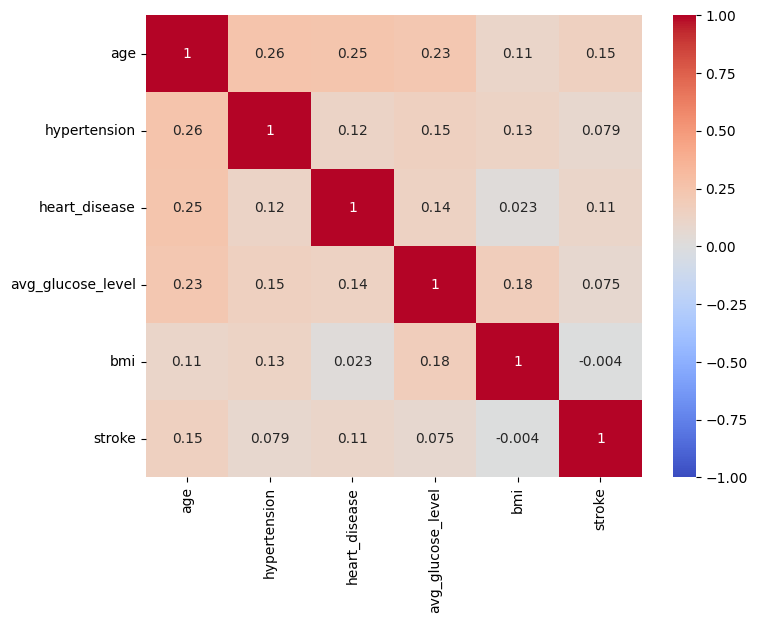

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(),vmin=-1, cmap='coolwarm', annot=True)

In [18]:
columns_selected = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
data = pd.get_dummies(data=data, columns=columns_selected)
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1,58.0,1,0,87.96,39.2,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
3,70.0,0,0,69.04,35.9,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
6,52.0,0,0,77.59,17.7,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
7,75.0,0,1,243.53,27.0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
8,32.0,0,0,77.67,32.3,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,58.64,20.4,0,1,0,0,1,...,0,0,0,0,1,0,1,0,1,0
43396,56.0,0,0,213.61,55.4,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
43397,82.0,1,0,91.94,28.9,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
43398,40.0,0,0,99.16,33.2,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0


In [19]:
X = data.drop('stroke', axis='columns')
y = data['stroke']

In [20]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1,58.0,1,0,87.96,39.2,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
3,70.0,0,0,69.04,35.9,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0
6,52.0,0,0,77.59,17.7,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0
7,75.0,0,1,243.53,27.0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0
8,32.0,0,0,77.67,32.3,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,58.64,20.4,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
43396,56.0,0,0,213.61,55.4,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0
43397,82.0,1,0,91.94,28.9,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0
43398,40.0,0,0,99.16,33.2,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0


In [21]:
y

1        0
3        0
6        0
7        0
8        0
        ..
43395    0
43396    0
43397    0
43398    0
43399    0
Name: stroke, Length: 29072, dtype: int64

In [24]:
sns.set(font_scale=1.5, style="whitegrid", font='Times New Roman')

<Axes: xlabel='stroke', ylabel='count'>

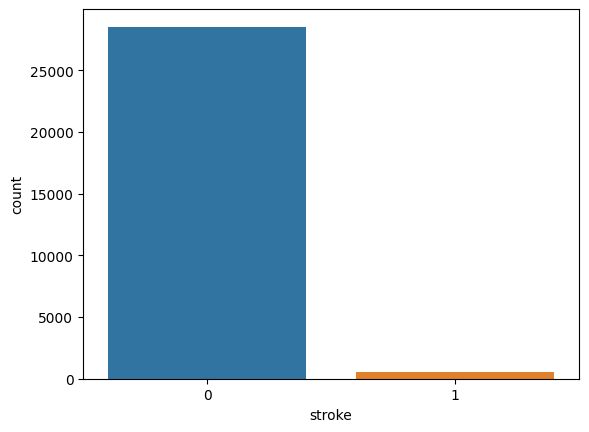

In [22]:
sns.countplot(x='stroke', data=data)

In [26]:
import matplotlib.font_manager
fonts = [f.name for f in matplotlib.font_manager.fontManager.ttflist]
print(fonts)

['DejaVu Serif', 'STIXSizeOneSym', 'DejaVu Sans Mono', 'cmss10', 'cmex10', 'STIXSizeFourSym', 'DejaVu Serif', 'STIXSizeThreeSym', 'STIXGeneral', 'cmtt10', 'DejaVu Sans', 'STIXSizeTwoSym', 'DejaVu Sans Mono', 'STIXNonUnicode', 'STIXSizeThreeSym', 'STIXGeneral', 'DejaVu Sans', 'STIXNonUnicode', 'cmsy10', 'STIXNonUnicode', 'STIXGeneral', 'DejaVu Sans', 'STIXSizeOneSym', 'DejaVu Serif', 'cmmi10', 'DejaVu Sans', 'STIXSizeFourSym', 'DejaVu Sans Display', 'STIXSizeFiveSym', 'DejaVu Serif Display', 'DejaVu Sans Mono', 'cmr10', 'STIXGeneral', 'STIXSizeTwoSym', 'STIXNonUnicode', 'DejaVu Sans Mono', 'cmb10', 'DejaVu Serif', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Sans', 'Liberation Mono', 'Liberation Mono', 'Liberation Serif', 'Liberation Mono', 'Liberation Sans', 'Humor Sans', 'Liberation Serif', 'Liberation Sans', 'Liberation Serif', 'Liberation Sans Narrow', 'Liberation Serif', 'Liberation Mono', 'Liberation Sans Narrow', 'Liberation Sans Narrow']


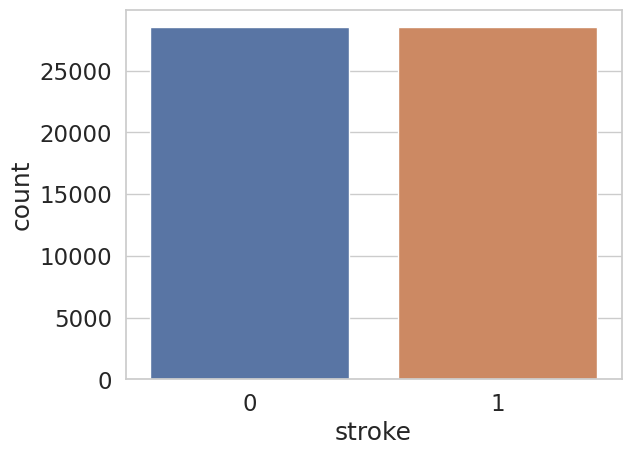

In [25]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)

y = pd.DataFrame({'stroke': y})
sns.countplot(data=y, x='stroke')
plt.savefig("randomooversampling.svg")

In [ ]:
y['stroke'].value_counts()

0    28524
1    28524
Name: stroke, dtype: int64

In [ ]:
#y_sm.values.ravel()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =47,stratify=y)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int (x) for x in np.linspace(start=200,stop=1000,num=5)]
max_features=['auto','sqrt','log2']
max_depth=[int (x) for x in np.linspace(10,1000,5)]
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 257, 505, 752, 1000], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion': ['entropy', 'gini']}


In [ ]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=50,cv=5,
                               verbose=2,random_state=100,n_jobs=-1)
rf_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 257, 505, 752, 1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=100, verbose=2)

In [ ]:
rf_randomcv.best_params_
rf_randomcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=505, max_features='auto',
                       min_samples_split=5, n_estimators=600)

In [ ]:
best_random_grid=rf_randomcv.best_estimator_

In [ ]:
y_pred=best_random_grid.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
y_pred_rf = best_random_grid.predict(X_test)
y_pred_rf

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
print(confusion_matrix(y_test,y_pred))
print("Accuracy: ",accuracy_score(y_test,y_pred))

[[5678   27]
 [   0 5705]]
Accuracy:  0.9976336546888694


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5705
           1       1.00      1.00      1.00      5705

    accuracy                           1.00     11410
   macro avg       1.00      1.00      1.00     11410
weighted avg       1.00      1.00      1.00     11410



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k=np.random.randint(1,70,50)
parameter={'n_neighbors': k}
parameter


{'n_neighbors': array([10, 31, 28, 52,  5, 17, 59, 56, 30, 61, 34,  8, 42, 67, 37, 10, 35,
        48, 49, 38,  4, 55,  4, 48, 18, 54, 25,  8, 66, 59, 65, 48, 19, 32,
        10, 23, 35, 29, 61, 23, 60, 15, 39, 34, 54, 17, 40, 29, 47, 32])}

In [ ]:
knn_2 = KNeighborsClassifier()
k_randomcv=RandomizedSearchCV(estimator=knn_2,param_distributions=parameter,n_iter=50,cv=3,
                               verbose=1,random_state=100,n_jobs=-1)
k_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'n_neighbors': array([10, 31, 28, 52,  5, 17, 59, 56, 30, 61, 34,  8, 42, 67, 37, 10, 35,
       48, 49, 38,  4, 55,  4, 48, 18, 54, 25,  8, 66, 59, 65, 48, 19, 32,
       10, 23, 35, 29, 61, 23, 60, 15, 39, 34, 54, 17, 40, 29, 47, 32])},
                   random_state=100, verbose=1)

In [ ]:
k_randomcv.best_params_

{'n_neighbors': 4}

In [ ]:
k_randomcv.best_estimator_

KNeighborsClassifier(n_neighbors=4)

In [ ]:
best_parameter=k_randomcv.best_estimator_

In [ ]:
y_pred=best_parameter.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
y_pred_knn = best_parameter.predict(X_test)
y_pred_knn

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
print(confusion_matrix(y_test, y_pred))
print("Accuracy: ",accuracy_score(y_test, y_pred))

[[5455  250]
 [   0 5705]]
Accuracy:  0.9780893952673094


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      5705
           1       0.96      1.00      0.98      5705

    accuracy                           0.98     11410
   macro avg       0.98      0.98      0.98     11410
weighted avg       0.98      0.98      0.98     11410



In [ ]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
logistic = linear_model.LogisticRegression(max_iter=6000)

C = np.logspace(0, 10, num=10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']

hyperparameters = dict(C=C, penalty=penalty, solver=solver)
hyperparameters

{'C': array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
        2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
        7.74263683e+08, 1.00000000e+10]),
 'penalty': ['l1', 'l2'],
 'solver': ['liblinear', 'saga']}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
lr_randomcv= RandomizedSearchCV(logistic, hyperparameters,cv=5,n_iter=40,n_jobs=-1,verbose=2)
lr_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=6000), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'C': array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
       2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
       7.74263683e+08, 1.00000000e+10]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   verbose=2)

In [ ]:
lr_randomcv.best_params_

{'solver': 'saga', 'penalty': 'l1', 'C': 12.91549665014884}

In [ ]:
lr_randomcv.best_estimator_

LogisticRegression(C=12.91549665014884, max_iter=6000, penalty='l1',
                   solver='saga')

In [ ]:
best_hyperparameters=lr_randomcv.best_estimator_

In [ ]:
y_pred=best_hyperparameters.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
y_pred_lr = best_hyperparameters.predict(X_test)
y_pred_lr

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
print(confusion_matrix(y_test,y_pred))
print("Accuracy: ",accuracy_score(y_test,y_pred))

[[4175 1530]
 [1142 4563]]
Accuracy:  0.7658194566170027


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      5705
           1       0.75      0.80      0.77      5705

    accuracy                           0.77     11410
   macro avg       0.77      0.77      0.77     11410
weighted avg       0.77      0.77      0.77     11410



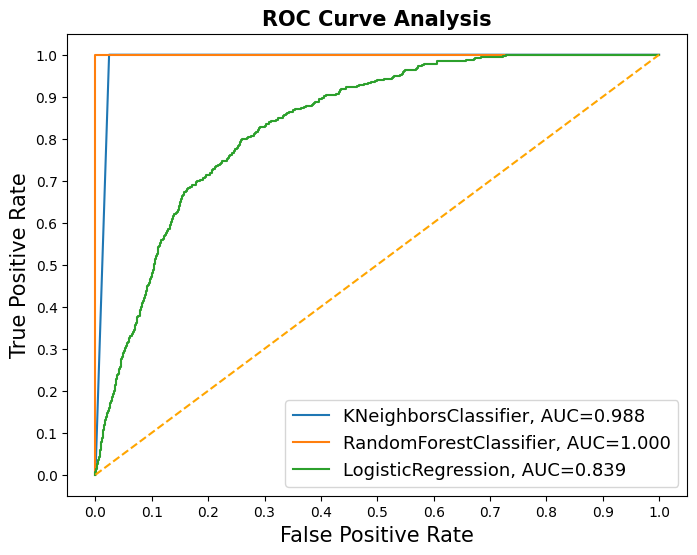

In [ ]:

import seaborn as sns
from sklearn.linear_model import LogisticRegression
classifiers =  [ KNeighborsClassifier(n_neighbors=2),
               RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=257, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, #min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False),
                LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=6000, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)]


# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::, 1]

    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)

    result_table = result_table.append({'classifiers': cls.__class__.__name__,
                                        'fpr': fpr,
                                        'tpr': tpr,
                                        'auc': auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8, 6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

plt.savefig("roc_rose.svg")

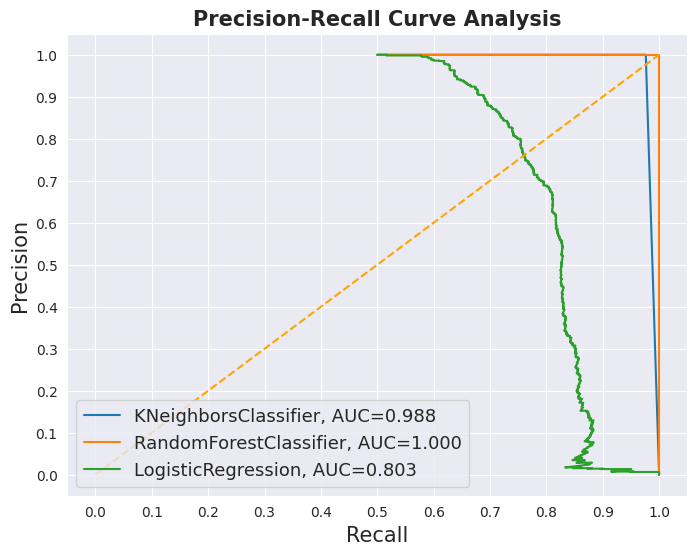

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score, auc
classifiers = [ KNeighborsClassifier(n_neighbors=2),
               RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=257, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, #min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False),
                LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=6000, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)]
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'lr_precision', 'lr_recall', 'lr_auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[:, 1]
    yhat = model.predict(X_test)

    lr_precision, lr_recall, _ = precision_recall_curve(y_test, yproba)
    lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)

    result_table = result_table.append({'classifiers': cls.__class__.__name__,
                                        'lr_precision': lr_precision,
                                        'lr_recall': lr_recall,
                                        'lr_auc': lr_auc}, ignore_index=True)
    # Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
sns.set_style("darkgrid")
fig = plt.figure(figsize=(8, 6))
for i in result_table.index:
    plt.plot(result_table.loc[i]['lr_precision'],
             result_table.loc[i]['lr_recall'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['lr_auc']))

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=15)

plt.title('Precision-Recall Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower left')

plt.savefig("prc_rose.svg")